## CSV 파일 형식
#### CSV 파일 헤더 구문분석

In [18]:
from pathlib import Path
import csv

path = Path('weather_data/sitka_weather_07-2021_simple.csv')
lines = path.read_text().splitlines()

reader = csv.reader(lines)  # csv 형식 텍스트 라인을 리스트로 반환하는 이터러블.
header_row = next(reader)   # 처음으로 한 줄을 읽어 온다. 다음에는 두 번째 줄이 읽힐 것이다.

print(header_row)

['STATION', 'NAME', 'DATE', 'TAVG', 'TMAX', 'TMIN']


#### 열 인덱스(Column Index) 및 열 이름(Column Name) 

In [19]:
from pathlib import Path
import csv

path = Path('weather_data/sitka_weather_07-2021_simple.csv')
lines = path.read_text().splitlines()

reader = csv.reader(lines)  # csv 형식 텍스트 라인을 리스트로 반환하는 이터러블.
header_row = next(reader)   # 처음으로 한 줄을 읽어 온다. 다음에는 두 번째 줄이 읽힐 것이다.

for index, column_header in enumerate(header_row):
    print(index, column_header)

0 STATION
1 NAME
2 DATE
3 TAVG
4 TMAX
5 TMIN


#### 특정 데이터 읽기

In [20]:
# 일 최고 기온 읽기 
highs = []
for row in reader:  # reader는 iterable 객체다.
    high = int(row[4])
    highs.append(high)

print(highs)

[61, 60, 66, 60, 65, 59, 58, 58, 57, 60, 60, 60, 57, 58, 60, 61, 63, 63, 70, 64, 59, 63, 61, 58, 59, 64, 62, 70, 70, 73, 66]


#### 데이터 시각화용 설정(제15장과 동일)

In [21]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns  # plt.style.use('seaborn-v0_8') 을 사용하는 경우에 한글 표시를 위해 필요하다.

# 그래프에 사용될 글꼴의 크기 정의 및 한글 사용 설정
plt.rcParams['font.size'] = 14
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['axes.titlesize'] = 14
plt.rcParams['legend.fontsize'] = 14
plt.rcParams['xtick.labelsize'] = 8
plt.rcParams['ytick.labelsize'] = 8
plt.rcParams['axes.labelsize'] = 10
plt.rcParams["font.family"] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

# 생성되는 그래프를 `images` 폴더에 저장하는 함수
from pathlib import Path

IMAGES_PATH = Path() / "images"
IMAGES_PATH.mkdir(parents=True, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = IMAGES_PATH / f"{fig_id}.{fig_extension}"
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

#### 온도 차트

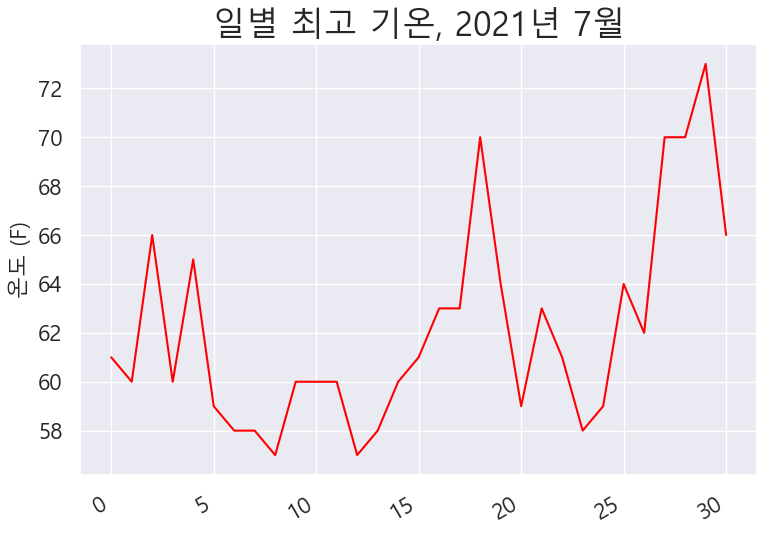

In [42]:
import matplotlib.pyplot as plt  # 앞으로 생략한다.

# 최고 기온 그리기.
plt.style.use('seaborn-v0_8')
sns.set_theme(font="Malgun Gothic", rc={"axes.unicode_minus":False})

fig, ax = plt.subplots()
ax.plot(highs, color='red')

# 그래프 꾸미기.
ax.set_title("일별 최고 기온, 2021년 7월", fontsize=24)
ax.set_xlabel('', fontsize=16)
fig.autofmt_xdate()
ax.set_ylabel("온도 (F)", fontsize=16)
ax.tick_params(labelsize=16)

save_fig('daily_high_temperatures')
plt.show()

#### `datetime` 모듈

In [43]:
from datetime import datetime
first_date = datetime.strptime('2021-07-01', '%Y-%m-%d')
print(first_date)

2021-07-01 00:00:00


In [44]:
time_data = "25/05/99 02:35:5.523"
format_data = "%d/%m/%y %H:%M:%S.%f"
first_date = datetime.strptime(time_data, format_data)
print(first_date)

1999-05-25 02:35:05.523000


#### 그래프에 날짜 표시하기

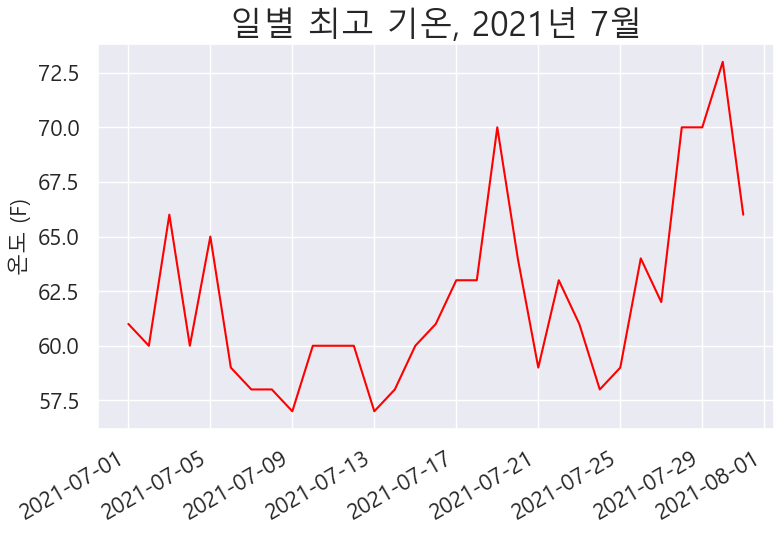

In [70]:
from datetime import datetime

reader = csv.reader(lines)  # 이터러블인 reader는 끝까지 다 반복했으므로, 초기화 필요.
next(reader)  # 포인터가 Header 다음 행을 가리키도록 조정.

# 날짜와 최고기온 읽기기.
dates, highs = [], []
for row in reader:
    current_date = datetime.strptime(row[2], '%Y-%m-%d')
    high = int(row[4])
    dates.append(current_date)
    highs.append(high)

# 최고기온 그래프.
plt.style.use('seaborn-v0_8')
sns.set_theme(font="Malgun Gothic", rc={"axes.unicode_minus":False})
fig, ax = plt.subplots()
ax.plot(dates, highs, color='red')  # 날짜와 기온의 짝을 맞추어 그린다.

# 그림 꾸미기.
ax.set_title("일별 최고 기온, 2021년 7월", fontsize=24)
ax.set_xlabel('', fontsize=16)
fig.autofmt_xdate()  # 날짜를 자동으로 기울여서 표시.
ax.set_ylabel("온도 (F)", fontsize=16)
ax.tick_params(labelsize=16)

save_fig('daily_high_temperatures_dates')
plt.show()

#### 장기 최고고기온 그래프

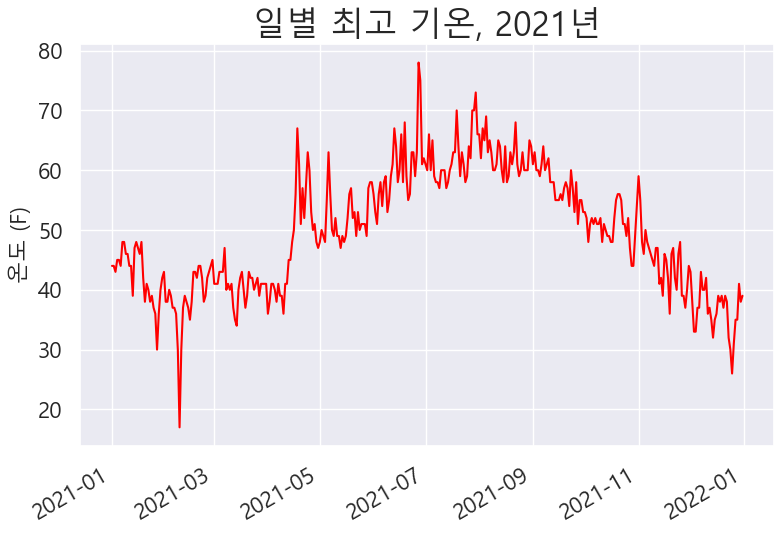

In [23]:
path = Path('weather_data/sitka_weather_2021_simple.csv')
lines = path.read_text().splitlines()

reader = csv.reader(lines)  # csv 형식 텍스트 라인을 리스트로 반환하는 이터러블.
header_row = next(reader)   # 처음으로 한 줄을 읽어 온다. 다음에는 두 번째 줄이 읽힐 것이다.

# 날짜와 최고기온 읽기.
dates, highs = [], []
for row in reader:
    current_date = datetime.strptime(row[2], '%Y-%m-%d')
    high = int(row[4])
    dates.append(current_date)
    highs.append(high)

# 최고기온 그래프.
plt.style.use('seaborn-v0_8')
sns.set_theme(font="Malgun Gothic", rc={"axes.unicode_minus":False})
fig, ax = plt.subplots()
ax.plot(dates, highs, color='red')  # 날짜와 기온의 짝을 맞추어 그린다.

# 그림 꾸미기.
ax.set_title("일별 최고 기온, 2021년", fontsize=24)
ax.set_xlabel('', fontsize=16)
fig.autofmt_xdate()  # 날짜를 자동으로 기울여서 표시.
ax.set_ylabel("온도 (F)", fontsize=16)
ax.tick_params(labelsize=16)

save_fig('daily_high_temperatures_dates_longterm')
plt.show()

#### 두 번째 데이터 시퀀스 그리기

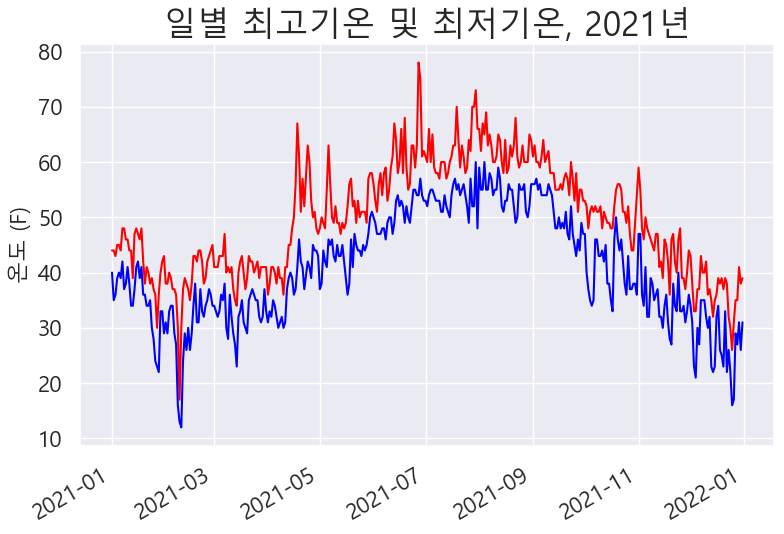

In [24]:
path = Path('weather_data/sitka_weather_2021_simple.csv')
lines = path.read_text().splitlines()

reader = csv.reader(lines)  # csv 형식 텍스트 라인을 리스트로 반환하는 이터러블.
header_row = next(reader)   # 처음으로 한 줄을 읽어 온다. 다음에는 두 번째 줄이 읽힐 것이다.

# 날짜, 최고기온, 최저기온 읽기.
dates, highs, lows = [], [], []
for row in reader:
    current_date = datetime.strptime(row[2], '%Y-%m-%d')
    high = int(row[4])
    low = int(row[5])
    dates.append(current_date)
    highs.append(high)
    lows.append(low)

# 최고기온, 최저기온 그래프 그리기.
plt.style.use('seaborn-v0_8')
sns.set_theme(font="Malgun Gothic", rc={"axes.unicode_minus":False})
fig, ax = plt.subplots()
ax.plot(dates, highs, color='red')
ax.plot(dates, lows, color='blue')

# 그림 꾸미기.
ax.set_title("일별 최고기온 및 최저기온, 2021년", fontsize=24)
ax.set_xlabel('', fontsize=16)
fig.autofmt_xdate()
ax.set_ylabel("온도 (F)", fontsize=16)
ax.tick_params(labelsize=16)

save_fig('daily_high_low_temperatures')
plt.show()


#### 차트 간격을 칠하기

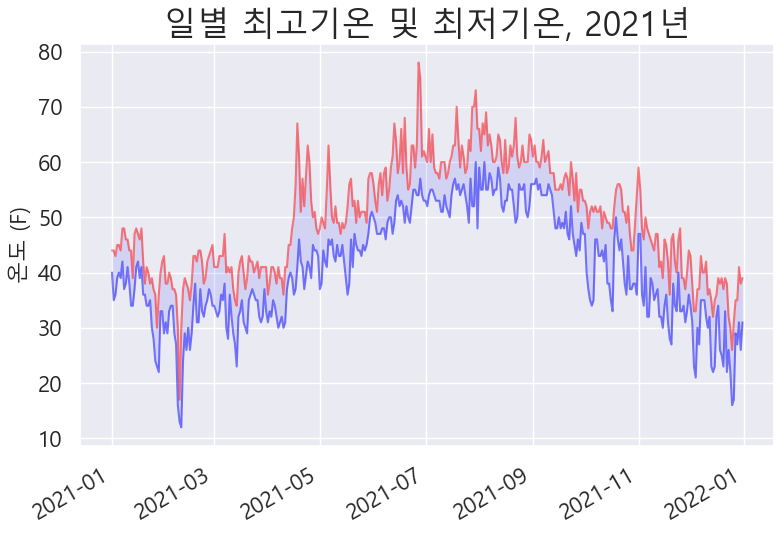

In [25]:
path = Path('weather_data/sitka_weather_2021_simple.csv')
lines = path.read_text().splitlines()

reader = csv.reader(lines)  # csv 형식 텍스트 라인을 리스트로 반환하는 이터러블.
header_row = next(reader)   # 처음으로 한 줄을 읽어 온다. 다음에는 두 번째 줄이 읽힐 것이다.

# 날짜, 최고기온, 최저기온 읽기.
dates, highs, lows = [], [], []
for row in reader:
    current_date = datetime.strptime(row[2], '%Y-%m-%d')
    high = int(row[4])
    low = int(row[5])
    dates.append(current_date)
    highs.append(high)
    lows.append(low)

# 최고기온, 최저기온 그래프 그리기.
plt.style.use('seaborn-v0_8')
sns.set_theme(font="Malgun Gothic", rc={"axes.unicode_minus":False})
fig, ax = plt.subplots()
ax.plot(dates, highs, color='red', alpha=0.5)
ax.plot(dates, lows, color='blue', alpha=0.5)
ax.fill_between(dates, highs, lows, facecolor='blue', alpha=0.1)

# 그림 꾸미기.
ax.set_title("일별 최고기온 및 최저기온, 2021년", fontsize=24)
ax.set_xlabel('', fontsize=16)
fig.autofmt_xdate()
ax.set_ylabel("온도 (F)", fontsize=16)
ax.tick_params(labelsize=16)

save_fig('daily_high_low_temperatures_shaded')
plt.show()

#### 이상치 및 누락 확인
**열 인덱스(Column Index) 및 열 이름(Column Name)**

In [ ]:
from pathlib import Path
import csv

path = Path('weather_data/death_valley_2021_simple.csv')
lines = path.read_text().splitlines()

reader = csv.reader(lines)
header_row = next(reader)

for index, column_header in enumerate(header_row):
    print(index, column_header)

0 STATION
1 NAME
2 DATE
3 TMAX
4 TMIN
5 TOBS


#### 죽음의 계곡 기온 그래프

In [ ]:
from pathlib import Path
import csv
from datetime import datetime
import matplotlib.pyplot as plt

path = Path('weather_data/death_valley_2021_simple.csv')
lines = path.read_text().splitlines()

reader = csv.reader(lines)
header_row = next(reader)

# 날짜, 최고기온, 최저기온 읽기.
dates, highs, lows = [], [], []
for row in reader:
    current_date = datetime.strptime(row[2], '%Y-%m-%d')
    high = int(row[3])
    low = int(row[4])
    dates.append(current_date)
    highs.append(high)
    lows.append(low)

# 최고기온, 최저기온 그래프 그리기.
plt.style.use('seaborn-v0_8')
sns.set_theme(font="Malgun Gothic", rc={"axes.unicode_minus":False})
fig, ax = plt.subplots()
ax.plot(dates, highs, color='red', alpha=0.5)
ax.plot(dates, lows, color='blue', alpha=0.5)
ax.fill_between(dates, highs, lows, facecolor='blue', alpha=0.1)

# 그림 꾸미기.
ax.set_title("일별 최고기온 및 최저기온, 2021년", fontsize=24)
ax.set_xlabel('', fontsize=16)
fig.autofmt_xdate()
ax.set_ylabel("온도 (F)", fontsize=16)
ax.tick_params(labelsize=16)

save_fig('daily_high_low_temperatures_shaded')
plt.show()

ValueError: invalid literal for int() with base 10: ''

#### 누락값 처리

Missing data for 2021-05-04 00:00:00


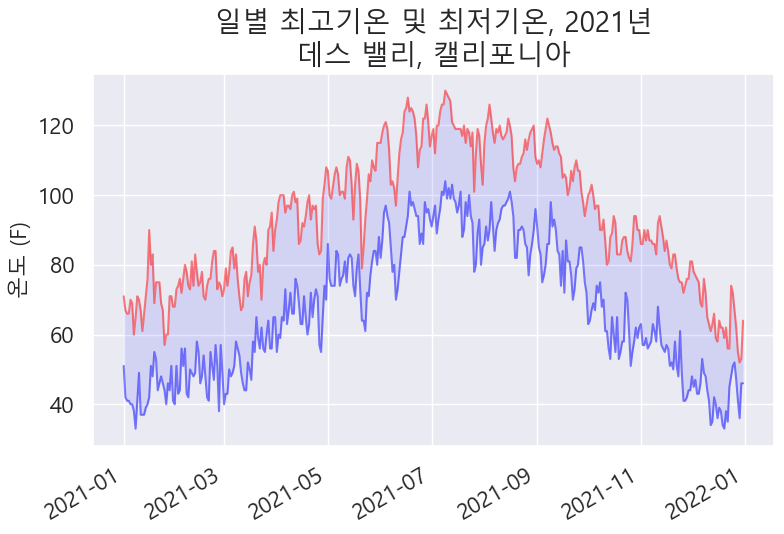

In [ ]:
path = Path('weather_data/death_valley_2021_simple.csv')
lines = path.read_text().splitlines()

reader = csv.reader(lines)
header_row = next(reader)

# 날짜, 최고기온, 최저기온 읽기.
dates, highs, lows = [], [], []
for row in reader:
    current_date = datetime.strptime(row[2], '%Y-%m-%d')
    try:
        high = int(row[3])
        low = int(row[4])
    except ValueError:
        print(f"Missing data for {current_date}")
    else:
        dates.append(current_date)
        highs.append(high)
        lows.append(low)

# 최고기온, 최저기온 그래프 그리기.
plt.style.use('seaborn-v0_8')
sns.set_theme(font="Malgun Gothic", rc={"axes.unicode_minus":False})
fig, ax = plt.subplots()
ax.plot(dates, highs, color='red', alpha=0.5)
ax.plot(dates, lows, color='blue', alpha=0.5)
ax.fill_between(dates, highs, lows, facecolor='blue', alpha=0.1)

# 그림 꾸미기.
title = "일별 최고기온 및 최저기온, 2021년\n데스 밸리, 캘리포니아"
ax.set_title(title, fontsize=20)
ax.set_xlabel('', fontsize=16)
fig.autofmt_xdate()
ax.set_ylabel("온도 (F)", fontsize=16)
ax.tick_params(labelsize=16)

save_fig('daily_high_low_temperatures_death_valley')
plt.show()